# Theoretical Part

1. Define machine learning and explain the difference between supervised, unsupervised, and reinforcement learning.\
Machine Learning is a branch of AI where systems learn patterns from data without explicit programming. Supervised learning uses labeled data to train models, unsupervised learning finds patterns in unlabeled data, and reinforcement learning learns through rewards/penalties in an environment.
2. What advantages does deep learning have over traditional machine learning models? Name two real-life applications. \
Deep Learning handles complex data (images, text) better and automatically learns features. Two real-world applications: facial recognition and machine translation.
3. Explain the purpose of the convolution and pooling layers in a CNN.\
Convolutional Layer: Detects local patterns. Pooling Layer: Reduces dimensionality while preserving key information.
4. Why are RNNs suitable for sequences (e.g., text or time series)? Name one limitation and how it is solved (e.g., LSTM).\
RNNs work well for sequences because they have "memory" (use previous outputs as inputs). Limitation: Vanishing gradient problem. Solution: LSTMs/GRUs use "gates" to control information flow.
5. Complete the dinosaur however you like.

# Practical Part

## Exercise 1: Machine Learning

Dataset: Iris (flower classification). \
Task:
* Load the dataset and split it into training/testing (80/20).
* Train a decision tree with a maximum depth of 3.
* Evaluate the accuracy on the test set and display the confusion matrix.
* Bonus (.5 pts): Explain how you could avoid overfitting in this model.

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

### Loading Data

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Splitting Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model

In [7]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

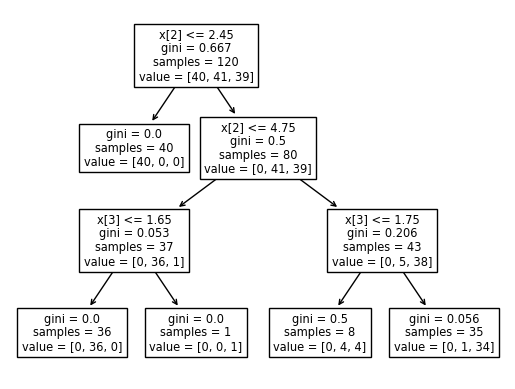

In [8]:
plot_tree(clf)
plt.show()

In [9]:
y_pred = clf.predict(X_test)
np.unique(y_pred)

array([0, 1, 2])

### Model Evaluation

In [10]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [11]:
accuracy_score(y_test, y_pred)

1.0

The model classify correctly.

## Exercise 2

### Importing libraries

In [19]:
import tensorflow as tf

### Loading Data and Splitting Data

In [20]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

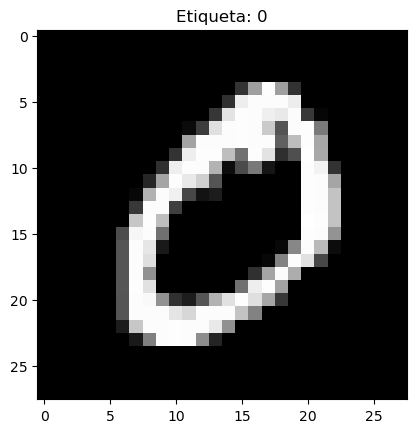

In [21]:
plt.imshow(X_train[1], cmap='gray')
plt.title(f'Etiqueta: {y_train[1]}')
plt.show()

### Encoding

In [24]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28)),
    tf.keras.layers.Reshape((28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3967 - loss: 1.9019 - val_accuracy: 0.8528 - val_loss: 0.5514
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8334 - loss: 0.5651 - val_accuracy: 0.8967 - val_loss: 0.3630
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8723 - loss: 0.4272 - val_accuracy: 0.9100 - val_loss: 0.3088
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8920 - loss: 0.3597 - val_accuracy: 0.9193 - val_loss: 0.2737
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9026 - loss: 0.3210 - val_accuracy: 0.9260 - val_loss: 0.2460
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9103 - loss: 0.2899 - val_accuracy: 0.9344 - val_loss: 0.2222
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9183 - loss: 0.2736 - val_accuracy: 0.9399 - val_loss: 0.2015
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9253 - loss: 0.2501 - val_acc

### Model Evaluation

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
f"\nTest Accuracy: {test_acc:.4f}"

313/313 - 1s - 3ms/step - accuracy: 0.9496 - loss: 0.1678
0.9495999813079834


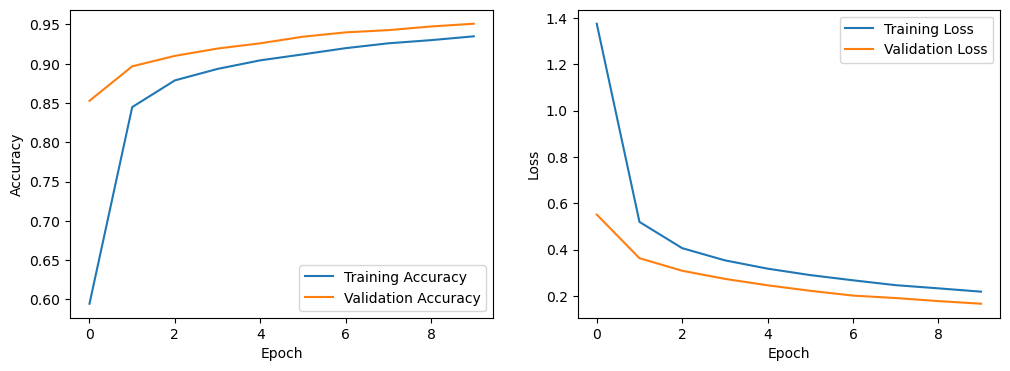

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

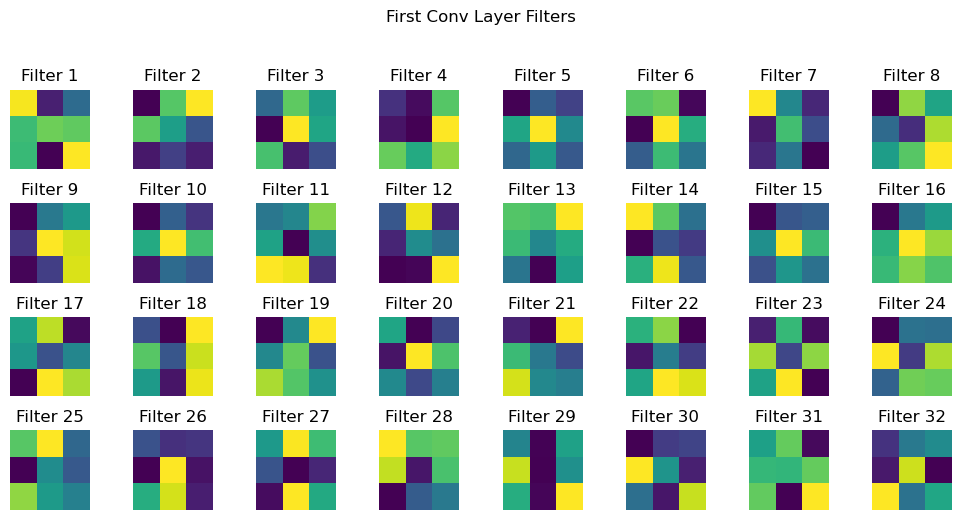

In [34]:
first_layer_weights = model.layers[2].get_weights()[0] 
first_layer_weights = first_layer_weights.squeeze()

plt.figure(figsize=(10, 5))
for i in range(32): 
    plt.subplot(4, 8, i+1)
    plt.imshow(first_layer_weights[:, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.suptitle('First Conv Layer Filters', y=1.03)
plt.tight_layout()
plt.show()

## Exercise 3

### Importing Libraries

In [48]:
from sklearn.metrics import classification_report

### Loading Data and Splitting Data

In [36]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Pad Sequence

In [39]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200, padding='post', truncating='post')

### Model

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=200),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - accuracy: 0.6464 - loss: 0.6029 - val_accuracy: 0.7464 - val_loss: 0.5068
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.8720 - loss: 0.3215 - val_accuracy: 0.8580 - val_loss: 0.3458
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9281 - loss: 0.2020 - val_accuracy: 0.8504 - val_loss: 0.3962
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9491 - loss: 0.1402 - val_accuracy: 0.8496 - val_loss: 0.4289
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 136ms/step - accuracy: 0.9626 - loss: 0.1100 - val_accuracy: 0.8522 - val_loss: 0.5170


### Model evaluation

In [49]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8323 - loss: 0.5720

Test Accuracy: 0.8332


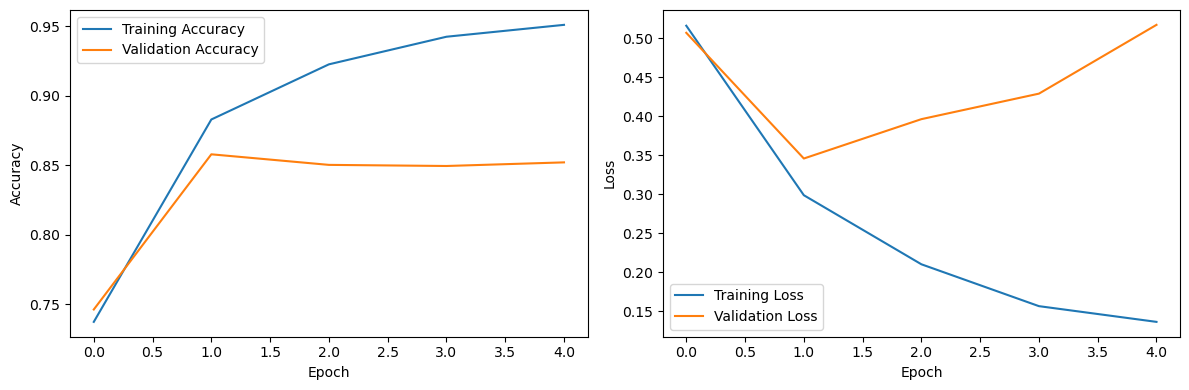

In [51]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

It would be good practice to reduce the number of epochs to 1.